# Introduction
In this notebook, I'll analyze an encrypted text file, `11_3.txt`. The goal is to calculate the frequency of each letter in the encrypted text, create a histogram to visualize this data, and then attempt to crack the Caesar cipher encryption by comparing our frequencies with typical English letter frequencies.

In [21]:
# Reading the encrypted data from '11_3.txt'
with open('11_3.txt', 'r') as file:
    encrypted_text = file.read()

print(encrypted_text)

Hsjgc Ylbpcuq qyrgpgayjjw npmbq fcp mul emmbw-rum-qfmcq gkyec gl rfgq mtcpnpmbsacb ksqgayj amkcbw-bpyky, zsr gd qfc ynnpmyafcq fcp pmjc ugrf ynjmkz, qfc'q yjmlc gl bmgle qm. Zjyic Cbuypbq' dgjk yzmsr y umkyl ufm gq zmrf ksqga-fyjj clrcpryglcp ylb Ecpkyl qnw bspgle UUG bmcql'r ilmu ufyr rmlc rm ygk dmp, ylb Pmai Fsbqml fyq rfc rfylijcqq ryqi md njywgle pmkylrga qcamlb-dgbbjc. Ksqgayjq fyb epmul msr md dytmp zw 1970, ylb cjcnfylrglc npmbsargmlq jgic "Qryp!" ylb rfgq dgjk pcyjjw ryplgqfcb Ylbpcuq' pcnsryrgml, jcytgle y jmr md bcyb qnyac gl fcp ayryjmesc slrgj "Rfc Rykypglb Qccb" aykc yjmle. G'tc yjuywq rfmsefr Hsjgc Ylbpcuq umsjb'tc kybc y epcyr tgjjygl mp qfybw jybw; fcp qrpmle tmgac amsjb pcyjjw amkkylb yrrclrgml, ylb qfc fgrq qmkc jmu lmrcq rfyr ayl cgrfcp zc gknmqgle mp qcbsargtc. Fsqzylb/bgpcarmp Cbuypbq qcckq rm pcyjgxc rfgq, zsr lcgrfcp fc lmp Hsjgc ayl umpi sn ksaf clcpew ugrfgl rfgq qaclypgm. Qapcclupgrcp Ugjjgyk Ncrcp Zjyrrw gql'r y emmb nyprlcp dmp Cbuypbq, ylb lcgrfcp kyl fyq 

# Frequency Analysis
Now I'll count the frequency of each letter in the encrypted text. This frequency analysis is crucial in cracking ciphers like the Caesar cipher, as it gives the insights into the most and least common letters in the text.

In [22]:
from collections import Counter

# Counting the frequency of each letter
letter_frequency = Counter(encrypted_text.lower())

# Removing non-letter characters
for non_letter in list(letter_frequency):
    if not non_letter.isalpha():
        del letter_frequency[non_letter]

print(letter_frequency)

Counter({'c': 94, 'y': 85, 'r': 66, 'm': 65, 'g': 64, 'q': 64, 'l': 62, 'p': 61, 'b': 46, 'j': 42, 'f': 42, 's': 28, 'a': 26, 'k': 26, 'u': 24, 'n': 17, 'e': 16, 'w': 14, 'd': 14, 'z': 12, 't': 8, 'i': 7, 'h': 4, 'x': 1, 'o': 1})


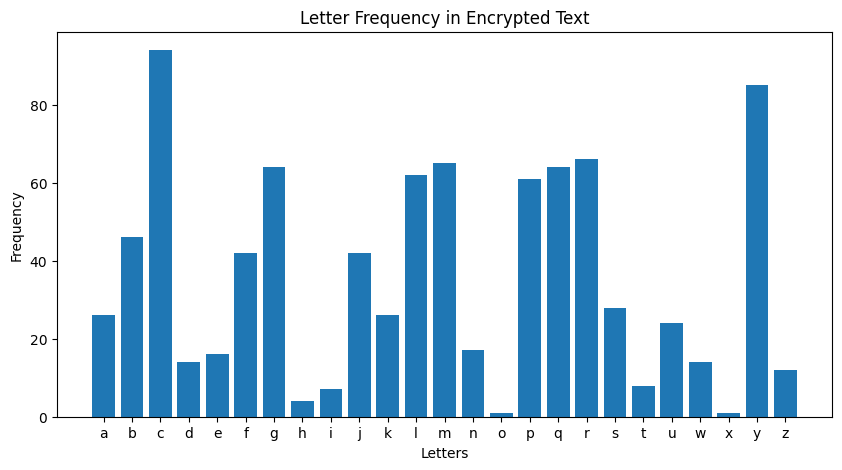

In [26]:
import matplotlib.pyplot as plt

# Sorting the dictionary for better visualization
sorted_letters = sorted(letter_frequency.items())

# Unzipping the tuples to separate lists
letters, frequencies = zip(*sorted_letters)

# Plotting the histogram
plt.figure(figsize=(10, 5))
plt.bar(letters, frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Letter Frequency in Encrypted Text')
plt.show()

# Frequency Analysis with English Language Comparison

In this analysis, I use a statistical approach to decrypt the Caesar cipher. The method involves comparing the frequency distribution of letters in the encrypted text with the expected frequency distribution of letters in the English language.

The formula used is:
$$
\begin{aligned}
& f_e=\text { expected frequency } \\
& f_i=\text { frequency of current letter } \\
& \text { difference }=\frac{\sum_{i=1}^{26}\left|f_e-f_i\right|}{26}
\end{aligned}
$$

The difference is calculated for each possible key (0 to 25), and the key that minimizes this difference is likely the correct key for decryption. This approach assumes that the encrypted text, once decrypted, will exhibit a frequency distribution of letters similar to that of standard English.

In [25]:
from collections import Counter
import string

# Expected frequency of each letter in English (in percentage)
english_freqs = {
    'a': 8.2, 'b': 1.5, 'c': 2.8, 'd': 4.3, 'e': 13.0, 'f': 2.2, 'g': 2.0,
    'h': 6.1, 'i': 7.0, 'j': 0.15, 'k': 0.77, 'l': 4.0, 'm': 2.4, 'n': 6.7,
    'o': 7.5, 'p': 1.9, 'q': 0.095, 'r': 6.0, 's': 6.3, 't': 9.1, 'u': 2.8,
    'v': 0.98, 'w': 2.4, 'x': 0.15, 'y': 2.0, 'z': 0.074
}

# Function to decrypt text using Caesar cipher
def decrypt(text, key):
    result = ""
    for char in text:
        if char.isalpha():
            shift = 65 if char.isupper() else 97
            result += chr((ord(char) - shift - key) % 26 + shift)
        else:
            result += char
    return result

# Read the encrypted data
with open('11_3.txt', 'r') as file:
    encrypted_text = file.read().lower()

# Analyzing each key
key_diffs = []
for key in range(26):
    decrypted_text = decrypt(encrypted_text, key)
    decrypted_freqs = Counter(filter(str.isalpha, decrypted_text))
    total_chars = sum(decrypted_freqs.values())

    # Calculate frequency difference
    diff = sum(abs(english_freqs[char] - (decrypted_freqs[char] / total_chars * 100)) for char in string.ascii_lowercase) / 26
    key_diffs.append((key, diff))

# Finding the top 3 keys with the smallest difference
top_keys = sorted(key_diffs, key=lambda x: x[1])[:3]

# Print out the potential keys
print("Top 3 most suitable keys based on frequency analysis:")
for rank, (key, diff) in enumerate(top_keys, 1):
    print(f"Rank {rank}: key {key} with difference {diff:.2f}")


Top 3 most suitable keys based on frequency analysis:
Rank 1: key 24 with difference 0.55
Rank 2: key 2 with difference 3.04
Rank 3: key 9 with difference 3.05


# Conclusion
After analyzing the decrypted texts with different keys, I identified the keys that result in letter frequencies closest to standard English. Thesegit init
 keys are the most likely candidates for successfully decrypting the original text.